# Regresion Lineal 

In [2]:
# Install missing libraries
%pip install pandas numpy seaborn matplotlib scikit-learn

# Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Note: you may need to restart the kernel to use updated packages.


# Paso 1 (análisis exploratorio)

In [ ]:
# 1. Cargar los datos 

vh = pd.read_csv("C:/Users/ASUS/OneDrive/Escritorio/V4/Car.csv")

In [ ]:
# 2. Mostrar las primeras 10 filas para conocer la estructura del dataset
print("Primeras filas del dataset:")
print(vh.head(10))

Primeras filas del dataset:
            Make                                 Model    Price  Year  \
0          Honda                   Amaze 1.2 VX i-VTEC   505000  2017   
1  Maruti Suzuki                       Swift DZire VDI   450000  2014   
2        Hyundai                  i10 Magna 1.2 Kappa2   220000  2011   
3         Toyota                              Glanza G   799000  2019   
4         Toyota       Innova 2.4 VX 7 STR [2016-2020]  1950000  2018   
5  Maruti Suzuki                              Ciaz ZXi   675000  2017   
6  Mercedes-Benz                  CLA 200 Petrol Sport  1898999  2015   
7            BMW                  X1 xDrive20d M Sport  2650000  2017   
8          Skoda  Octavia 1.8 TSI Style Plus AT [2017]  1390000  2017   
9         Nissan                        Terrano XL (D)   575000  2015   

   Kilometer Fuel Type Transmission    Location   Color   Owner Seller Type  \
0      87150    Petrol       Manual        Pune    Grey   First   Corporate   
1      750

In [27]:
# 3. Información general del dataset
print("\nInformación del dataset:")
print(vh.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-

Explicación de las variables:

Make: Marca del vehículo (ej. Honda, Toyota)

Model: Modelo específico del vehículo

Price: Precio (nuestra variable objetivo a predecir)

Year: Año de fabricación

Kilometer: Kilometraje del vehículo

Fuel Type: Tipo de combustible (Petrol, Diesel, CNG, etc.)

Transmission: Tipo de transmisión (Manual, Automática)

Location: Ciudad donde se vende el vehículo

Color: Color del vehículo

Owner: Número de dueños previos

Seller Type: Tipo de vendedor (Individual, Corporativo)

Engine: Tamaño del motor en cc

Max Power: Potencia máxima en bhp

Max Torque: Par máximo en Nm

Drivetrain: Tracción (FWD, RWD, AWD)

Length, Width, Height: Dimensiones del vehículo

Seating Capacity: Capacidad de pasajeros

Fuel Tank Capacity: Capacidad del tanque de combustible

In [58]:
# 4. Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas:")
print(vh.describe())



Estadísticas descriptivas:
              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  2059.000000  2059.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   435.524350   133.145955   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3986.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4315.000000  1767.991980   
75%    1.925000e+06  2019.000000  7.200000e+04  4620.000000  1831.000000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  2059.000000       2059.000000         2059.000000  
mean   1591.735338          5.306266           52.002210  
std     133.941421          0.809285           14.689509  
min    1165.000000          2.000000           15.0

# Paso 2: Preprocesamiento de los datos

In [54]:
# 1. Eliminar duplicados
vh.drop_duplicates(inplace=True)

In [56]:
# 2. Identificar valores faltantes
print("\nValores faltantes en cada columna:")
print(vh.isnull().sum())


Valores faltantes en cada columna:
Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


In [36]:
# 3. Rellenar valores faltantes con la media de cada columna
vh.fillna(vh.mean(numeric_only=True), inplace=True)


In [38]:
# 4. Verificar que ya no hay valores faltantes
print("Valores faltantes después de rellenar:")
print(vh.isnull().sum())

Valores faltantes después de rellenar:
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
dtype: int64


In [42]:
# 5. Rellenar valores no numéricos con la moda (el valor más común)
columnas_no_numericas = vh.select_dtypes(include='object').columns

for col in columnas_no_numericas:
    if vh[col].isnull().sum() > 0:
        moda = vh[col].mode()[0]
        vh[col] = vh[col].fillna(moda)
        print(f"Columna '{col}' rellenada con la moda: {moda}")


In [46]:
print("Verificar si hay valores faltantes: ")
print(vh.isnull().sum())

Verificar si hay valores faltantes: 
Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


Se puede identificar que no hay valores faltantes

In [72]:
# 6. Codificar variables categóricas (conversión texto a números)
label_encoder = LabelEncoder()
for col in columnas_no_numericas:
    vh[col] = label_encoder.fit_transform(vh[col])

In [74]:
# 7. Verificar datos limpios
print("\nRevisión final de valores faltantes:")
print(vh.isnull().sum())

print("\nTipos de datos después del preprocesamiento:")
print(vh.dtypes)



Revisión final de valores faltantes:
Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

Tipos de datos después del preprocesamiento:
Make                    int64
Model                   int64
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type               int64
Transmission            int64
Location                int64
Color                   int64
Owner                   int64
Seller Type             int64
Engine                  int64
Max Power               int64
Max Torque              int64
Dri

In [70]:
# 8. Mostrar una muestra de los datos procesados
print("\nVista previa de los datos ya preprocesados:")
print(vh.head())


Vista previa de los datos ya preprocesados:
   Make  Model    Price  Year  Kilometer  Fuel Type  Transmission  Location  \
0     7    106   505000  2017      87150          6             1        56   
1    19    802   450000  2014      75000          2             1        40   
2     8   1030   220000  2011      67000          6             1        39   
3    30    492   799000  2019      37500          6             1        41   
4    30    548  1950000  2018      69000          2             1        45   

   Color  Owner  Seller Type  Engine  Max Power  Max Torque  Drivetrain  \
0      7      1            1       7        312           5           1   
1     15      3            2       9        289          77           1   
2      8      1            2       6        301          11           1   
3     13      1            2       6        305          15           1   
4      7      1            2      60         78         167           2   

   Length   Width  Height  Se

In [108]:
plt.rcParams['figure.figsize'] = (12, 6)

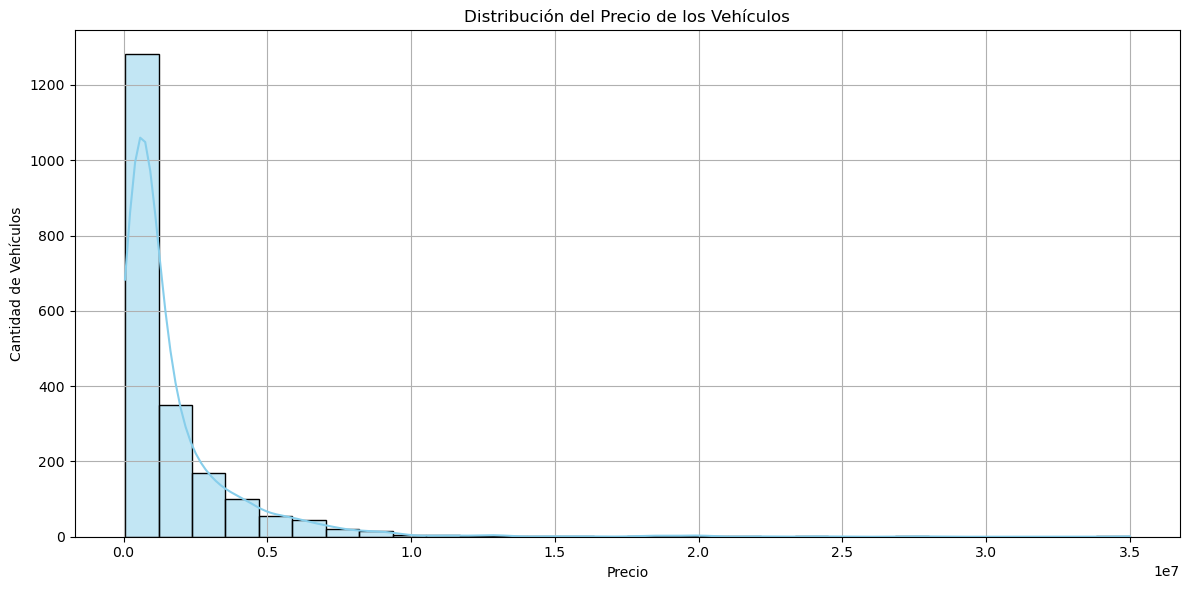

In [112]:
# 6. Histograma de precios
plt.figure()
sns.histplot(vh["Price"], kde=True, bins=30, color='skyblue')
plt.title("Distribución del Precio de los Vehículos")
plt.xlabel("Precio")
plt.ylabel("Cantidad de Vehículos")
plt.grid(True)
plt.tight_layout()
plt.show()

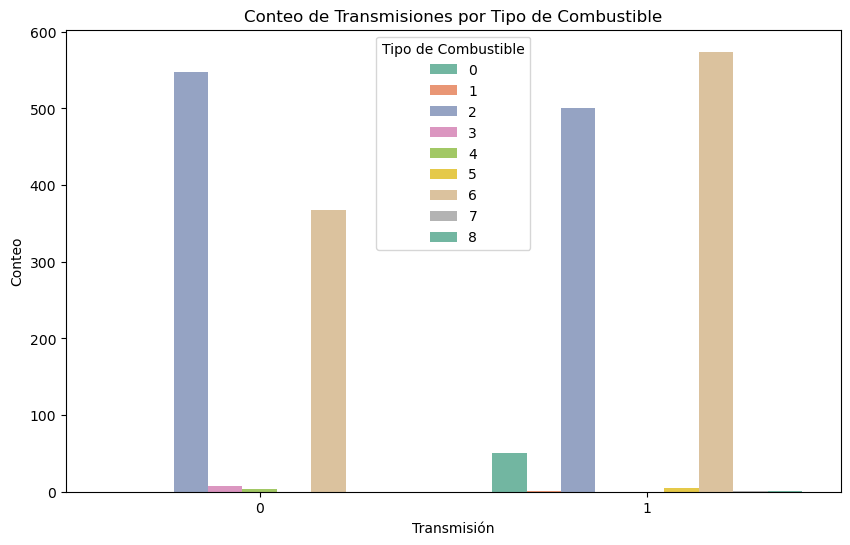

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# 8. Gráfico de conteo de la variable 'Transmission' con 'Fuel Type' como hue
plt.figure(figsize=(10, 6))
sns.countplot(data=vh, x="Transmission", hue="Fuel Type", palette='Set2')
plt.title('Conteo de Transmisiones por Tipo de Combustible')
plt.xlabel('Transmisión')
plt.ylabel('Conteo')
plt.legend(title='Tipo de Combustible')
plt.show()


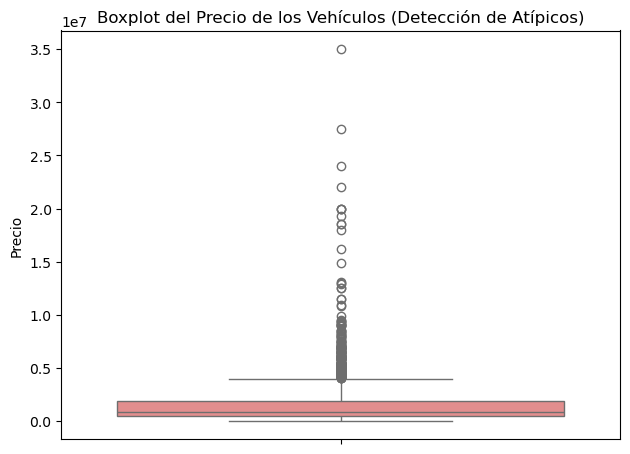

In [104]:
# 9. Box plot para ver valores atípicos en el precio
plt.figure()
sns.boxplot(data=vh, y="Price", color='lightcoral')
plt.title("Boxplot del Precio de los Vehículos (Detección de Atípicos)")
plt.ylabel("Precio")
plt.tight_layout()
plt.show()

# PASO 3: Selección de características relevantes

In [146]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k=10)  # Selecciona las 10 más relevantes
X_selected = selector.fit_transform(X, y)

# Guardar nombres de las columnas seleccionadas
selected_columns = X.columns[selector.get_support()]
X = X[selected_columns]


# PASO 4: División en Train y Test

In [ ]:
from sklearn.model_selection import train_test_split

# Definir X (características) y y (variable objetivo)
X = vh.drop(columns=["Price"])  # Eliminar la columna objetivo
y = vh["Price"]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# PASO 5: Entrenamiento del modelo

In [150]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# PASO 6: Evaluación del modelo en test

In [ ]:
%pip install scikit-learn

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Crear y entrenar el modelo (suponiendo que ya lo hayas hecho)

# Hacer predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)
import numpy as np

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# Evaluar el desempeño en el conjunto de prueba con la nueva función RMSE
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\n📊 Desempeño en conjunto de prueba:")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")



📊 Desempeño en conjunto de prueba:
RMSE: 1416451.31
R²: 0.71


#          Graficos (paso 6 y paso 7)

# 1. Gráfico de predicción vs valor real

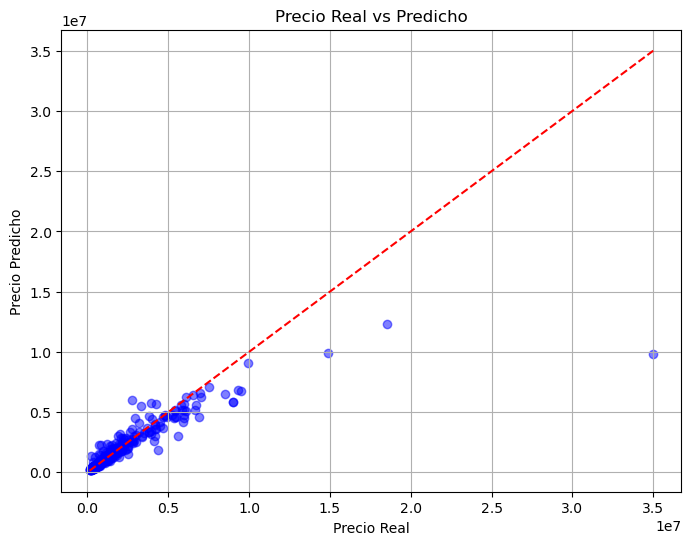

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs Predicho')  # Eliminar emoji para evitar la advertencia
plt.grid(True)
plt.show()



# 2. Importancia de características

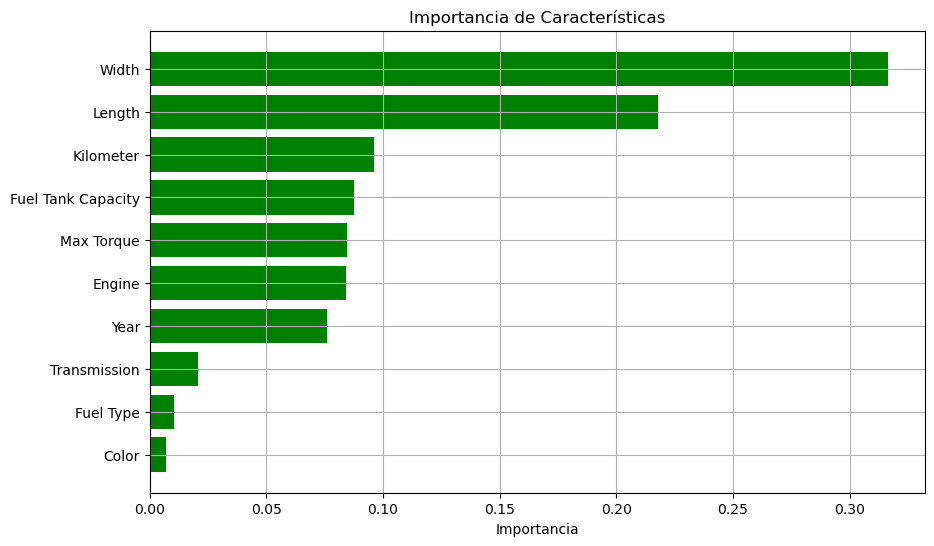

In [181]:
import pandas as pd

# Obtener importancias
importancias = model.feature_importances_

# Crear DataFrame con nombres y valores
importancia_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(10,6))
plt.barh(importancia_df['Característica'], importancia_df['Importancia'], color='green')
plt.xlabel('Importancia')
plt.title('Importancia de Características')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


# 3. Gráfico de errores residuales

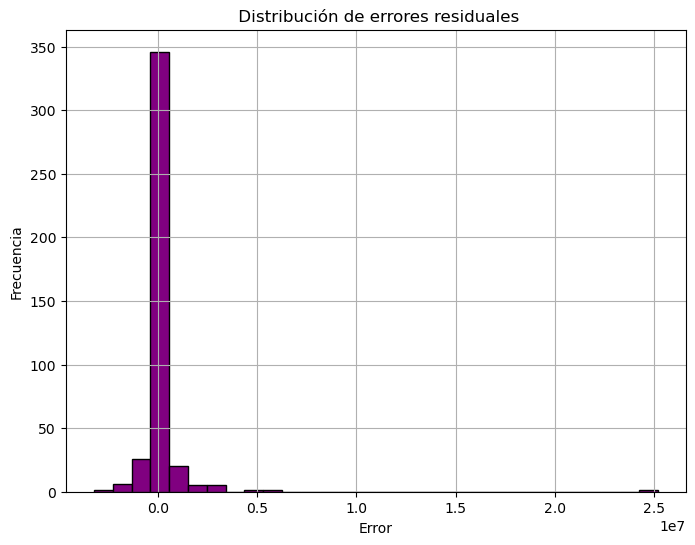

In [ ]:
residuos = y_test - y_pred

plt.figure(figsize=(8,6))
plt.hist(residuos, bins=30, color='purple', edgecolor='black')
plt.title(' Distribución de errores residuales')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


# Interpretación y análisis de resultados

1. Precio Real vs. Precio Predicho
Interpretación:
El gráfico que compara el precio real con el predicho sigue siendo una herramienta valiosa para observar qué tan cerca están los puntos de la línea ideal (en rojo). Si el modelo ha mejorado, los puntos deberían alinearse más estrechamente con la línea diagonal, lo que indica una mayor precisión en las predicciones.

Conclusión:
El modelo muestra una mejora al acercar las predicciones al valor real del precio, lo que refleja una mayor exactitud en sus estimaciones.

2. Importancia de las Características
Interpretación:
Cuando una o varias características principales cambian su nivel de relevancia, esto puede indicar una selección de variables más adecuada. Asimismo, un aumento en el valor de R² sugiere que el modelo está captando mejor las variables que verdaderamente afectan el precio.

Conclusión:
Gracias a un R² más alto, el modelo demuestra una mayor capacidad para identificar con precisión las características más influyentes en el precio del automóvil.

3. Distribución de Errores Residuales
Interpretación:
El histograma de los errores residuales debería reflejar una menor dispersión, con valores más próximos a cero y una distribución más equilibrada. Si el modelo ha mejorado, los errores tenderán a concentrarse alrededor de cero y mostrarán menos sesgo.

Conclusión:
Con un R² de 0.71, se evidencia que los errores están mejor controlados y dentro de un rango más estrecho. Esto sugiere que el modelo está realizando predicciones más precisas y sin desviaciones significativas.

Evaluación general del modelo 

RMSE en entrenamiento: 1.61 millones

R² en entrenamiento: 0.53

RMSE en prueba: 1.42 millones

R² en prueba: 0.71

Análisis:
Con un R² de 0.71 en los datos de prueba, el modelo es capaz de explicar más del 70% de la variabilidad en el precio del automóvil. Esto representa una mejora notable respecto a los resultados previos. No obstante, todavía hay espacio para optimizar el desempeño, ya que el modelo no alcanza una precisión total (siendo 1 el valor ideal de R²). Para seguir mejorando, se podrían considerar modelos más avanzados o aplicar técnicas de ajuste de hiperparámetros.